<a href="https://colab.research.google.com/github/distinctkemi/CE888/blob/main/%5CLab%208%5CCopy_of_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_wine

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

* We have loaded the necessary libraries above
* Now let's load the data

In [104]:
data = load_wine(as_frame=True)
df = data.data.copy()  # features
# Look at the documentation (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html)
# and save the label in a column called 'y' in df.
df['y'] = data.target ## YOUR CODE HERE # label
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,y
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
features = df.iloc[:, :-1]
features

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [ ]:
#How many samples and features are there?


# YOUR CODE HERE
print('number of samples:', len(df), 'number of features:', len(features.columns) )

number of samples: 178 number of features: 13


In [ ]:
# Quiz Q1
# How many instances are there for each class? 
df['y'].value_counts()
# YOUR CODE HERE


1    71
0    59
2    48
Name: y, dtype: int64

In [ ]:
# Calculate the means, medians, and standard deviations of each feature
# YOUR CODE HERE
features.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


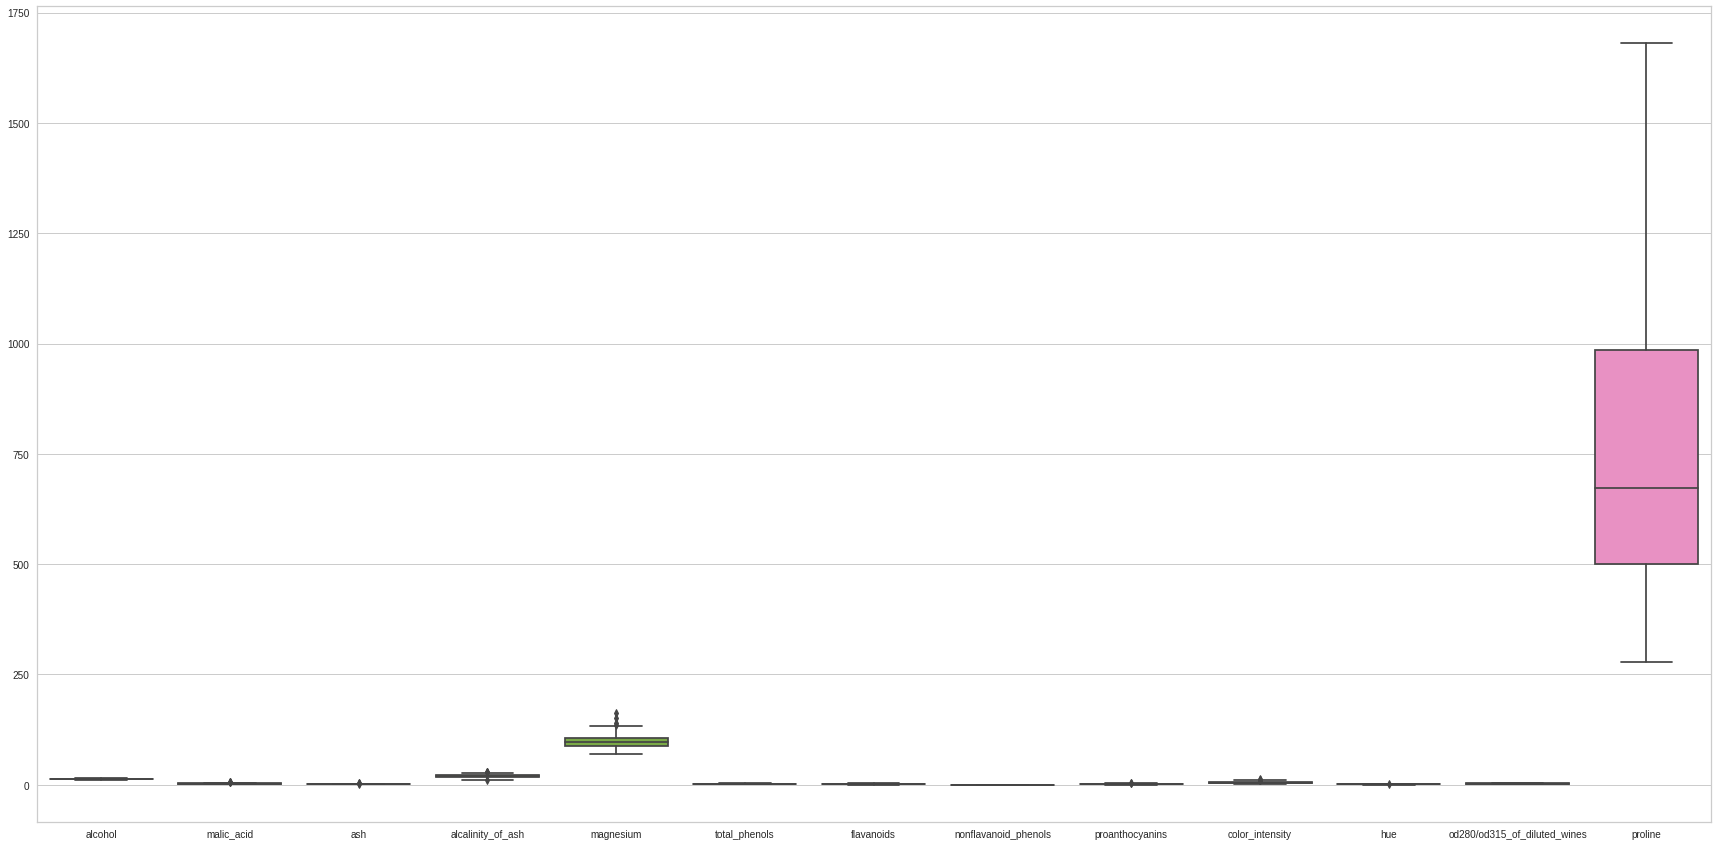

In [95]:
# Plot a boxplot of each feature (NOT THE LABEL!!) (all in one plot -- you can do this with a single line of code).
# Quiz Q2: Is there any feature that is in a clearly different scale than the others?


plt.figure(figsize=(30,15))
_ = sns.boxplot(data = features)
# YOUR CODE HERE

In [109]:
def column_average(df, column):
    col = column
    avg = df[col].mean()
    # Your code here
    return avg ### and/or here


In [110]:
column_average(df, 'alcohol')

13.000617977528083

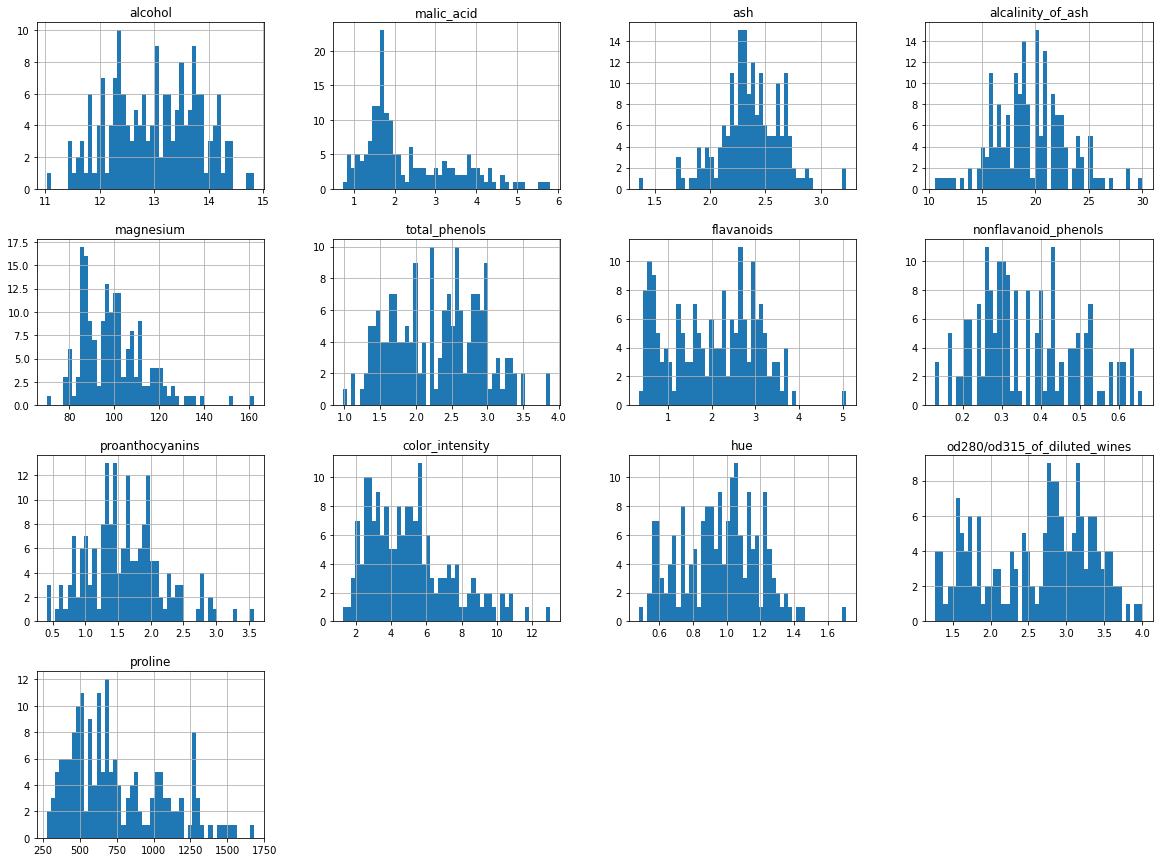

In [19]:
# Let's look at the distributions of values of our features. Draw a histogram for each of the features
his = features.hist(bins=50, figsize=(20,15))

# YOUR CODE HERE

Let's do some multivariate analysis

In [22]:
# Calculate the correlations between each pair of variables

cor = features.corr()
cor
# YOUR CODE HERE



# YOUR CODE HERE

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


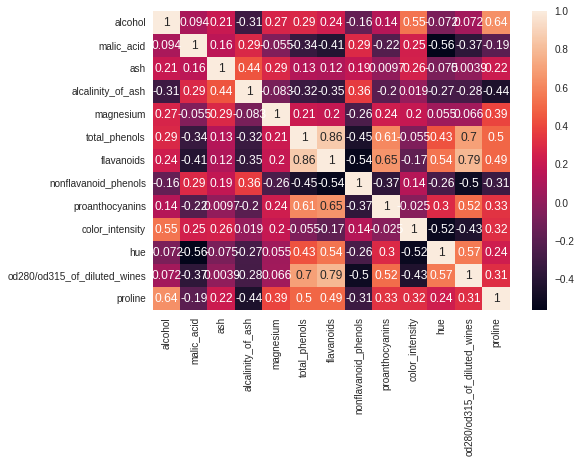

In [94]:
# Plot a heatmap of the correlations between pairs of FEATURES (i.e., don't include the target!)
sns.heatmap(cor, annot = True)

In [23]:
# What is the highest correlation between features?

cor.max()

alcohol                         1.0
malic_acid                      1.0
ash                             1.0
alcalinity_of_ash               1.0
magnesium                       1.0
total_phenols                   1.0
flavanoids                      1.0
nonflavanoid_phenols            1.0
proanthocyanins                 1.0
color_intensity                 1.0
hue                             1.0
od280/od315_of_diluted_wines    1.0
proline                         1.0
dtype: float64

You should have noticed that some of the features are highly correlated. 

For this reason, we can run into trouble when trying to train a classifier due to multicolinearity.

Let's do PCA on this dataset to remove these correlations

In [29]:
# Let's do PCA:
# HINT: I suggest you attempt Q5 of the quiz and then use the function you developed
#       in this and some of the following cells.

# 1. Standardise your data using a StandardScaler. Make sure you're not scaling the 'y'!
scale= StandardScaler()
scaled= scale.fit_transform(features) 


# YOUR CODE HERE




In [31]:
# 2. Do PCA with 2 components. How much variance is retained from the original dataset?

# YOUR CODE HERE
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(scaled)
principalDf = pd.DataFrame(data = principalComponents)
principalDf



,0,1
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831
...,...,...
173,-3.370524,-2.216289
174,-2.601956,-1.757229
175,-2.677839,-2.760899
176,-2.387017,-2.297347


In [42]:
pca = PCA(n_components=0.85)
principalComponents = pca.fit_transform(scaled)
principalDf1 = pd.DataFrame(data = principalComponents)
principalDf1


,0,1,2,3,4,5
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520
...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783


In [32]:
print(pca.explained_variance_ratio_)


[0.36198848 0.1920749 ]


In [39]:
features.shape

(178, 13)

In [40]:
label.shape

(178,)

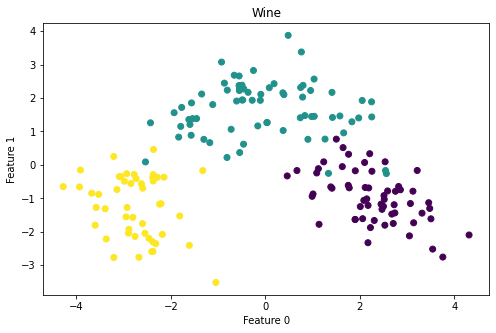

In [41]:
# Plot your two components, using the label from the data to colour the points
plt.figure(figsize=(8,5))
plt.title('Wine', fontsize=12)
#plt.grid(True)
plt.scatter(principalDf[0], principalDf[1], c=label)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.savefig('moons_scatter_colour.pdf', dpi=300)
plt.show()


# YOUR CODE HERE


In [35]:
label = df['y']
label

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: y, Length: 178, dtype: int64

In [55]:
# How many components do you need to keep at least 85% of the variance in the dataset? (Q6)
pca_85 = PCA(n_components=0.85)
principalComponents = pca_85.fit_transform(scaled)
principalDf1 = pd.DataFrame(data = principalComponents)
principalDf1


# YOUR CODE HERE


,0,1,2,3,4,5
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520
...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783


In [111]:
# How much variance is retained if we do PCA with 3 components? (Q7)
pca3 = PCA(n_components=3)
principalComponents = pca3.fit_transform(scaled)
principalDf2 = pd.DataFrame(data = principalComponents)


# YOUR CODE HERE


In [112]:
print(pca3.explained_variance_ratio_)

[0.36198848 0.1920749  0.11123631]


## Clustering

Let's see how many clusters does K-Means find.



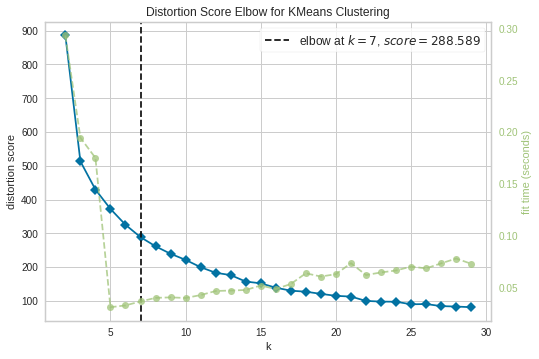

In [56]:
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
visualizer.fit(principalDf2)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

In [ ]:
# Use the elbow method to select the number of clusters in your data using 3 PCs.

# YOUR CODE HERE


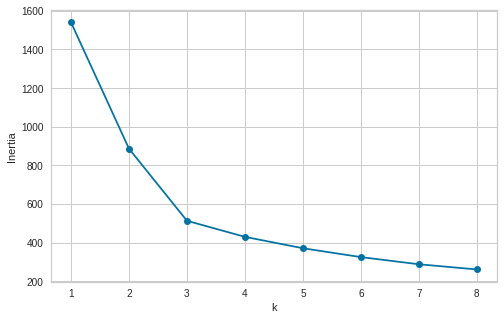

In [69]:
inertias = []
for k in range(1, 9):
  kmeans = KMeans(n_clusters=k)
  y_pred = kmeans.fit_predict(principalDf2)
  inertias.append(kmeans.inertia_)
# Let's plot inertia vs number of clusters
plt.figure(figsize=(8,5))
plt.plot(range(1, 9), inertias, 'o-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

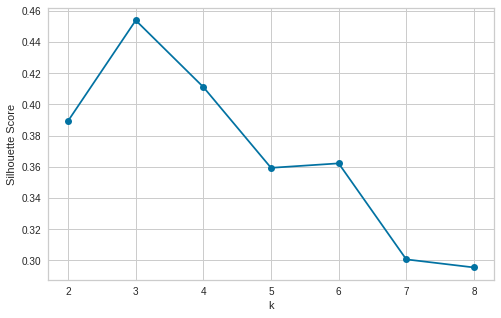

In [63]:
# Now use the silhouette score to choose between the two candidate k values from the previous cell
sil = []
for k in range(2, 9):
  kmeans = KMeans(n_clusters=k)
  y_pred = kmeans.fit_predict(principalDf2)
  sil.append(silhouette_score(principalDf2, y_pred))
# Let's plot SIL vs number of clusters
plt.figure(figsize=(8,5))
plt.plot(range(2, 9), sil, 'o-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.show()

# YOUR CODE HERE


3


Text(0, 0.5, 'PC 1')

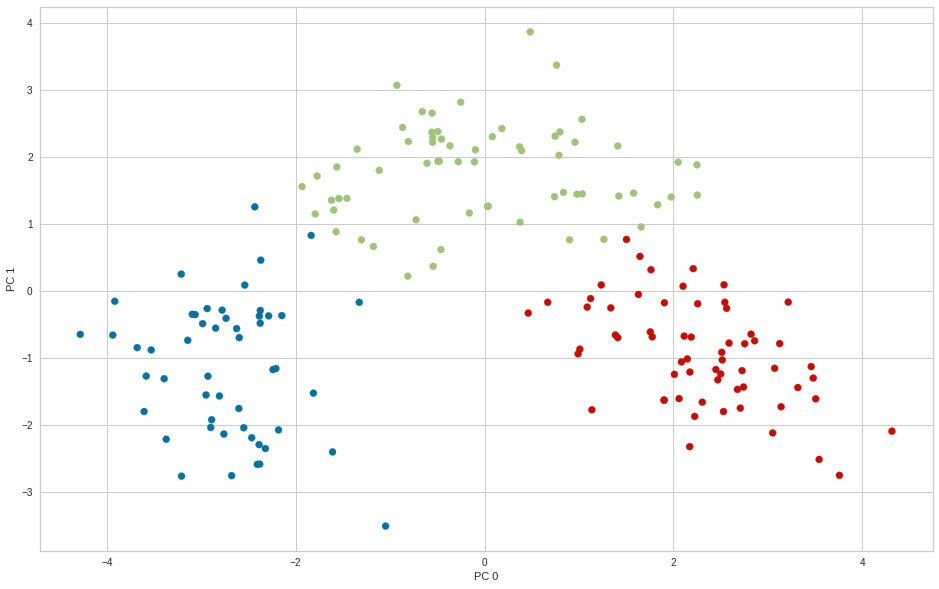

In [82]:
# Visualise the first two pcs (using a scatterplot) using the labels from KMeans with your chosen value of k
clusterer = KMeans(n_clusters=3)
clusterer.fit(principalComponents)
print(len(set(clusterer.labels_)))  # how many clusters did it find?
labels_rgb = ['r' if l==0 else 'g' if l==1 else 'b' for l in clusterer.labels_]
# And plot them
plt.figure(figsize=(16,10))
plt.scatter(principalComponents[:,0], principalComponents[:,1], c=labels_rgb)
plt.xlabel('PC 0')
plt.ylabel('PC 1')

# YOUR CODE HERE


Now we can try to understand our clusters.

In [83]:
# In the original (before PCA and before standardisation) dataframe, add a column called 'cluster' that contains
# the cluster assignment from above
df['cluster'] = clusterer.labels_

# YOUR CODE HERE


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd43b0b09d0>,
      dtype=object)

<Figure size 1440x1080 with 0 Axes>

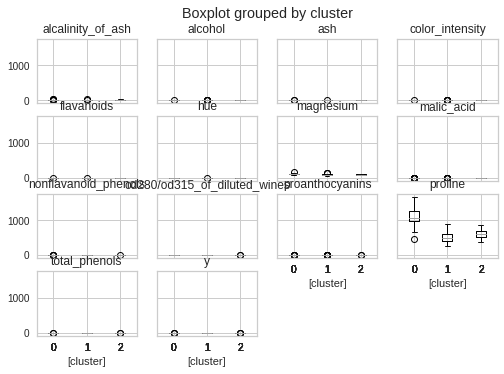

In [91]:
# Do a boxplot of each feature, separating between clusters

plt.figure(figsize=(20,15))
df.boxplot(by='cluster')
#ax = sns.boxplot(x="day", y="total_bill", hue="smoker",
#                 data=tips, palette="Set3")

# YOUR CODE HERE


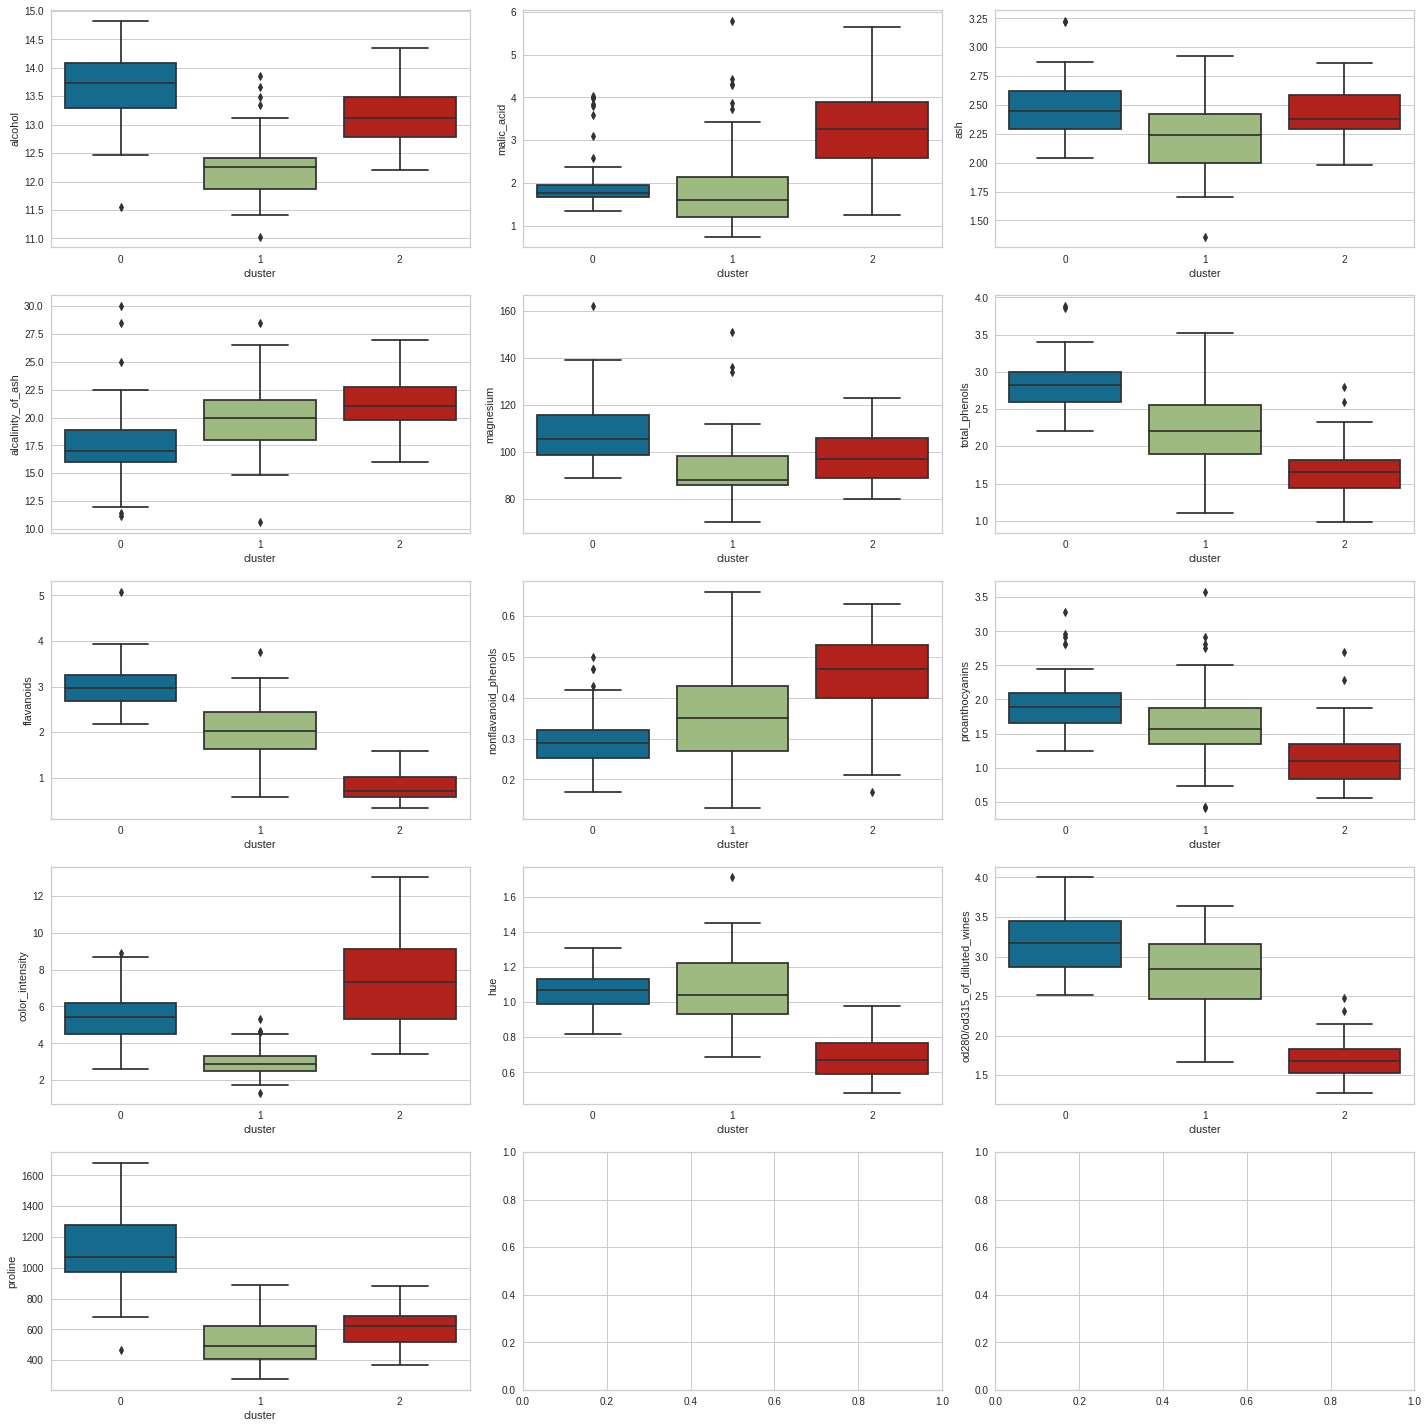

In [92]:
rows, cols = 5, 3
fig, ax = plt.subplots(nrows = rows, ncols = cols, figsize = (20,20))
idx = 0
for i in range(rows):
  for j in range(cols):
    sns.boxplot( x= 'cluster', y = df[df.columns[idx]], data =df, ax=ax[i][j])
    idx +=1
    if idx > len (df.columns) - 3:
      break
    
plt.tight_layout()

Write your observations here.
For example: is there a clear difference between the clusters in terms of alcohol content? What about flavanoids?

In [ ]:
# Feel free to keep playing with the data here!